In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('retail_sales_dataset.csv') 

In [5]:
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [9]:
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

- Here we see there are no missing values

In [12]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


- Age has a mean of 41 years. Means most of the customers are in their 40
- Average customers bought 2.5 products in average
- The products has average per unit price of 180 dollars
- Max quantity one customer bought is 4 and max per unit price is 500 dollar
- Minimum per unit price is 25 dollars
- And the standard deviations are shown above

# Sales and Revenue Analysis

In [22]:
# •	What are the total sales for the dataset

In [20]:
Total_Sales = df['Total Amount'].sum()
print("Total Sale is : ",Total_Sales)

Total Sale is :  456000


In [24]:
# •	What is the average transaction value

In [32]:
Average_Sales = df['Total Amount'].mean()
print("Average Sale is : ",Average_Sales)

Average Sale is :  456.0


# Time Series Analysis

In [35]:
# •	How have sales trends changed over time? 

In [37]:
df['Date'] = pd.to_datetime(df['Date'])

In [39]:
df['Month'] = df['Date'].dt.to_period('M')  
monthly_sales = df.groupby('Month')['Total Amount'].sum()

In [47]:
df['Week'] = df['Date'].dt.to_period('W')  
weekly_sales = df.groupby('Week')['Total Amount'].sum()

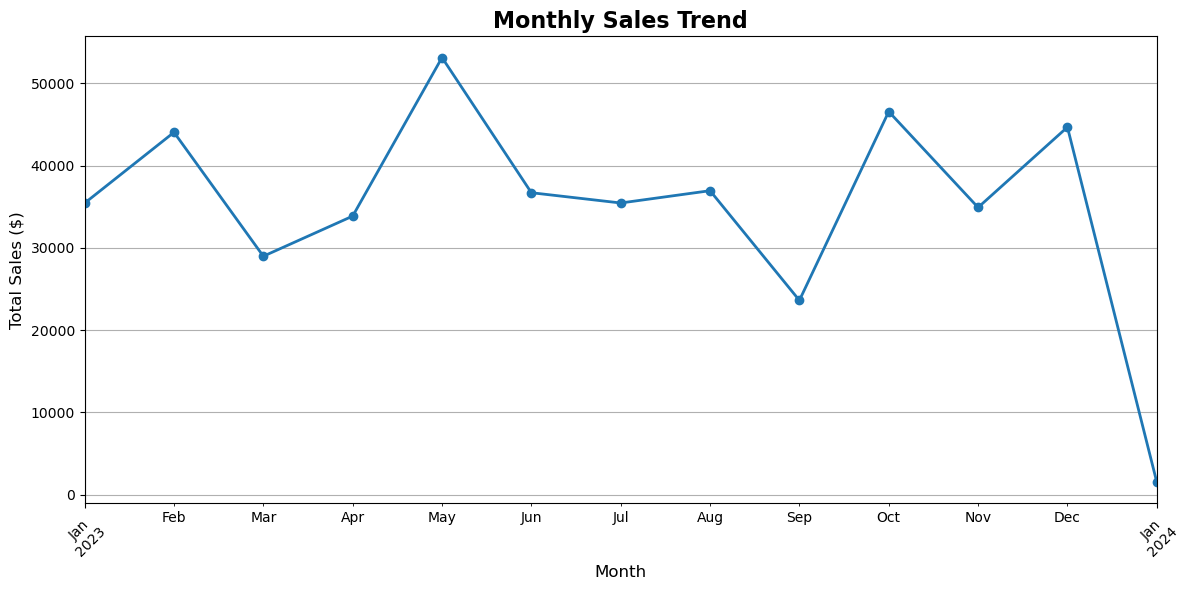

In [43]:
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', color='tab:blue', linewidth=2, marker='o')
plt.title('Monthly Sales Trend', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

- Here we can see that in the May month, Total sales have increased
- And from december to january the sells have decreased

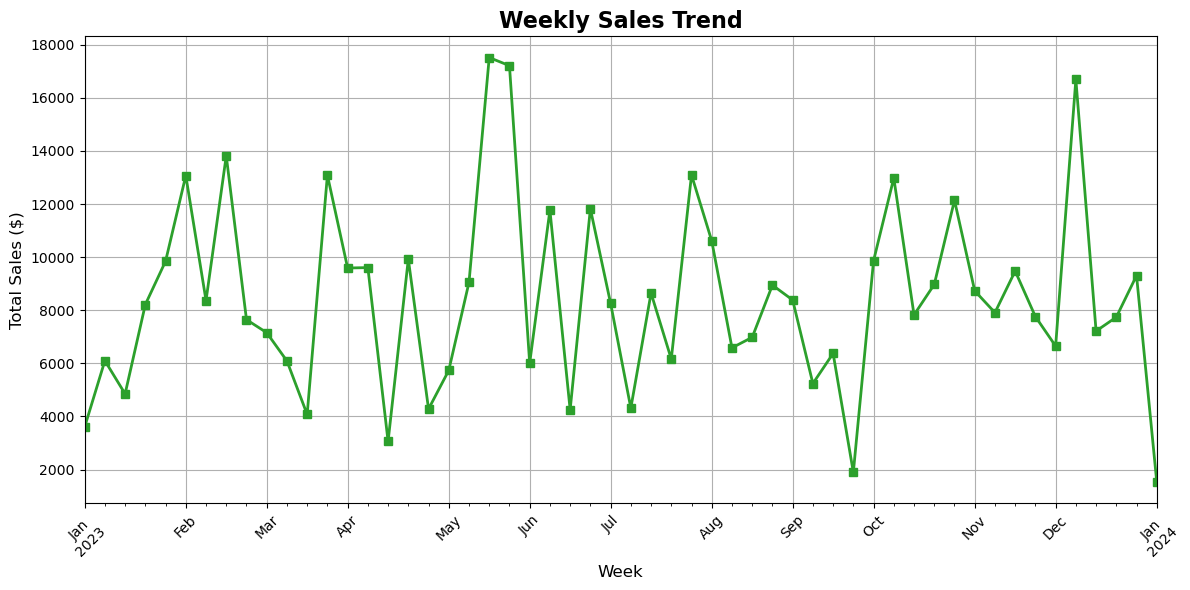

In [49]:
plt.figure(figsize=(12, 6))
weekly_sales.plot(kind='line', color='tab:green', linewidth=2, marker='s')
plt.title('Weekly Sales Trend', fontsize=16, fontweight='bold')
plt.xlabel('Week', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

- Again from May to June the sells have increased in a weekly manner

In [51]:
df['Month_Num'] = df['Date'].dt.month  
monthly_sales_seasonality = df.groupby('Month_Num')['Total Amount'].sum()

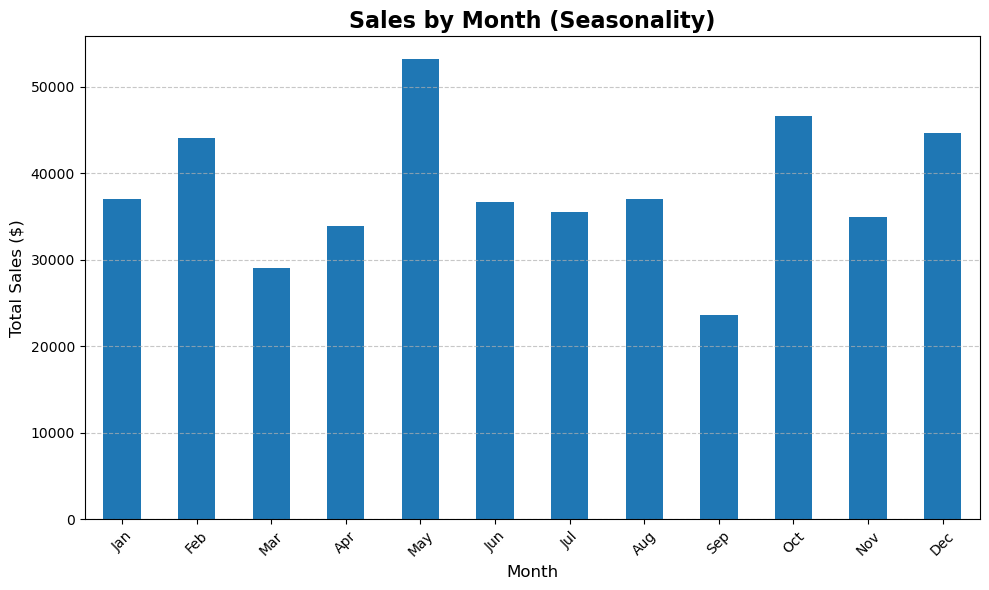

In [63]:
plt.figure(figsize=(10, 6))
monthly_sales_seasonality.plot(kind='bar', color='tab:blue')
plt.title('Sales by Month (Seasonality)', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [65]:
df['Year'] = df['Date'].dt.year  
annual_sales = df.groupby('Year')['Total Amount'].sum()

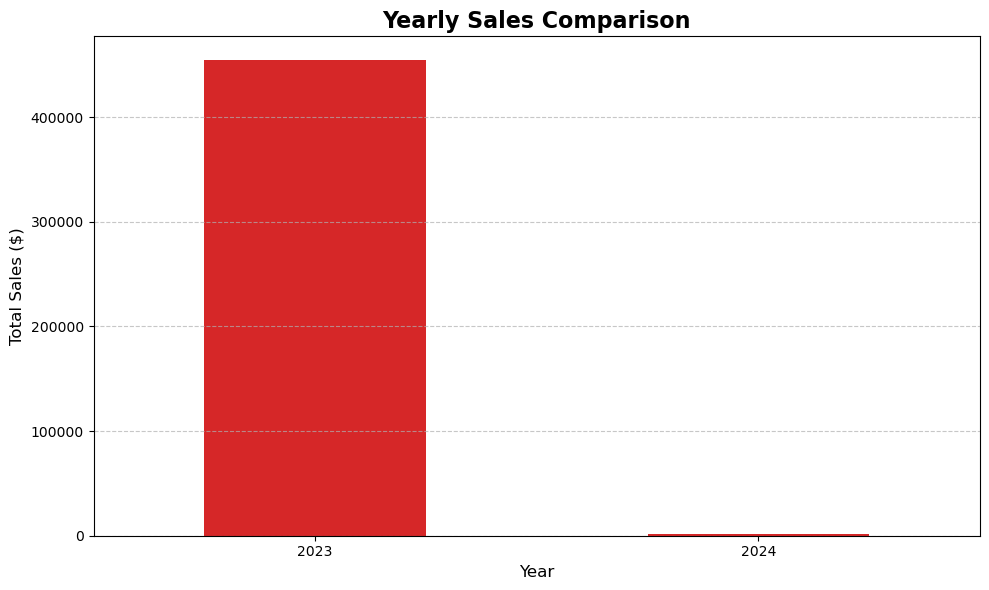

In [67]:
plt.figure(figsize=(10, 6))
annual_sales.plot(kind='bar', color='tab:red')
plt.title('Yearly Sales Comparison', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [77]:
bins = [18, 23, 27, 32, 37, 42, 47, 52, 57, 62, 100]
labels = ['18-23', '23-27', '27-32', '32-37', '37-42', '42-47', '47-52', '52-57', '57-62', '62+']

df['Age Range'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)


In [79]:
Sales_By_Age = df.groupby('Age Range')['Total Amount'].sum()

C:\Users\HP\AppData\Local\Temp\ipykernel_14684\2233289137.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Sales_By_Age = df.groupby('Age Range')['Total Amount'].sum()


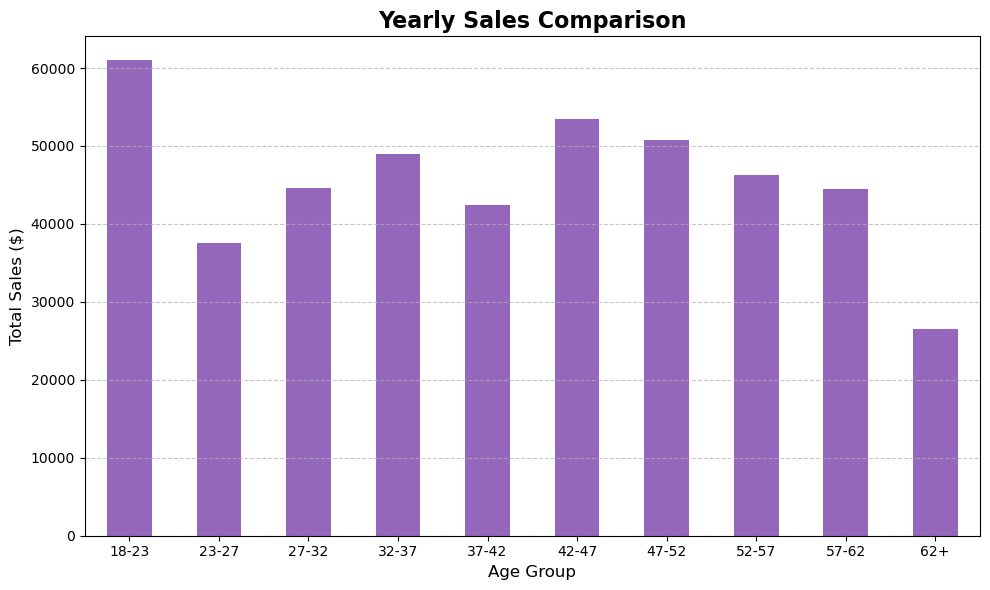

In [135]:
plt.figure(figsize=(10, 6))
Sales_By_Age.plot(kind='bar', color='tab:Purple')
plt.title('Yearly Sales Comparison', fontsize=16, fontweight='bold')
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

- Here we can see that most of the products were bought by the age group of 18-23
- Then 42-47 age group bought the highest sum of products

In [104]:
Sales_By_Category = df.groupby("Product Category")['Total Amount'].sum()
Sales_By_Category

Product Category
Beauty         143515
Clothing       155580
Electronics    156905
Name: Total Amount, dtype: int64

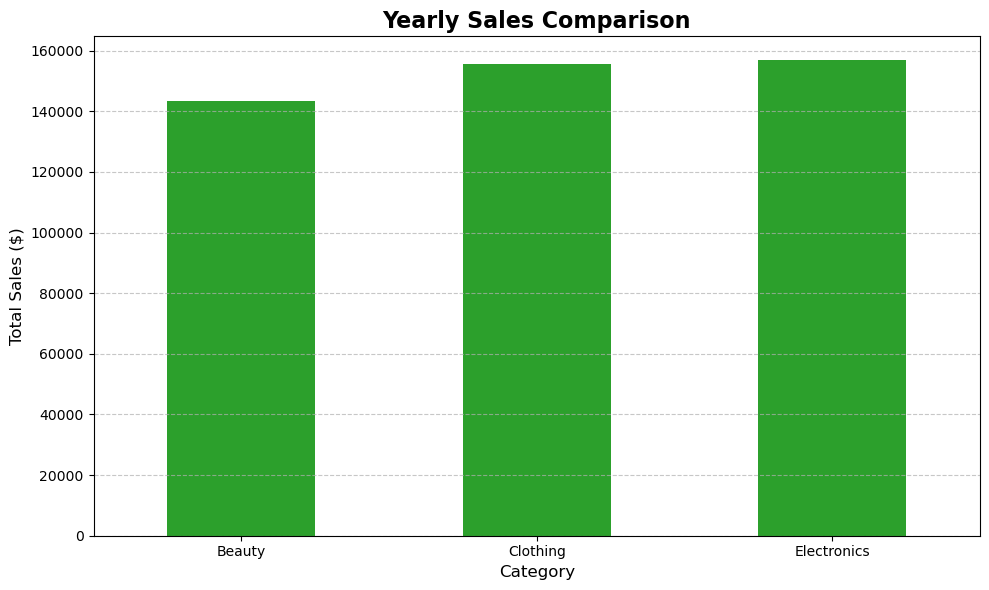

In [131]:
plt.figure(figsize=(10, 6))
Sales_By_Category.plot(kind='bar', color='tab:Green')
plt.title('Yearly Sales Comparison', fontsize=16, fontweight='bold')
plt.xlabel('Category', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

- Clearly it can be seen that customers bought electronics product more than any product

In [109]:
Quantity_Category = df.groupby("Product Category")['Quantity'].sum()

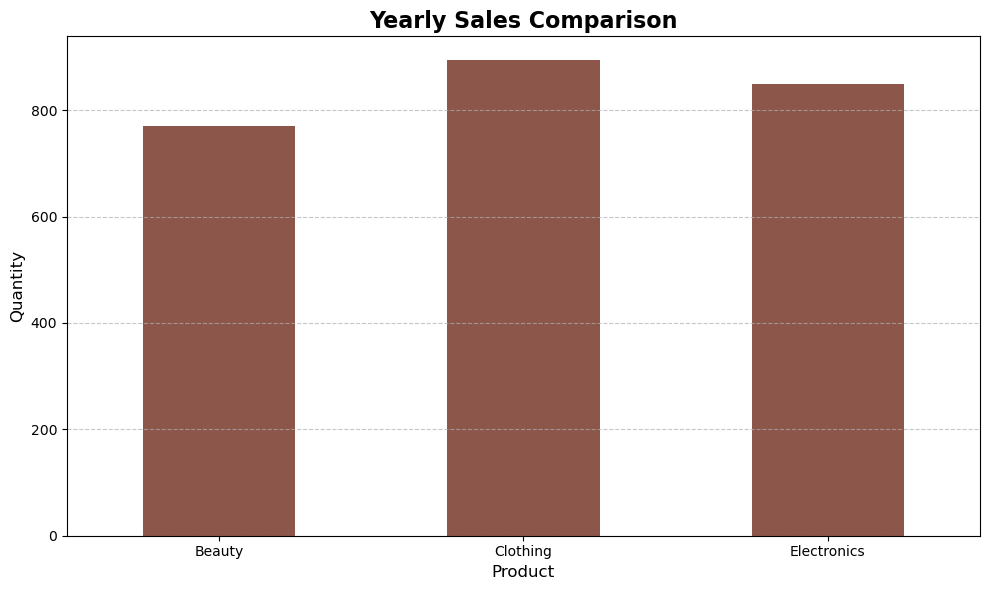

In [129]:
plt.figure(figsize=(10, 6))
Quantity_Category.plot(kind='bar', color='tab:brown')
plt.title('Yearly Sales Comparison', fontsize=16, fontweight='bold')
plt.xlabel('Product', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

- But customers bought more cloths than electronics in quantity
- As price per unit of electronics is larger, the total sum is larger as well

In [120]:
df['Gender'].value_counts()

Gender
Female    510
Male      490
Name: count, dtype: int64

- Clearly there are more Female customers than Male

In [123]:
Gender_Classification = df.groupby("Gender")['Total Amount'].sum()

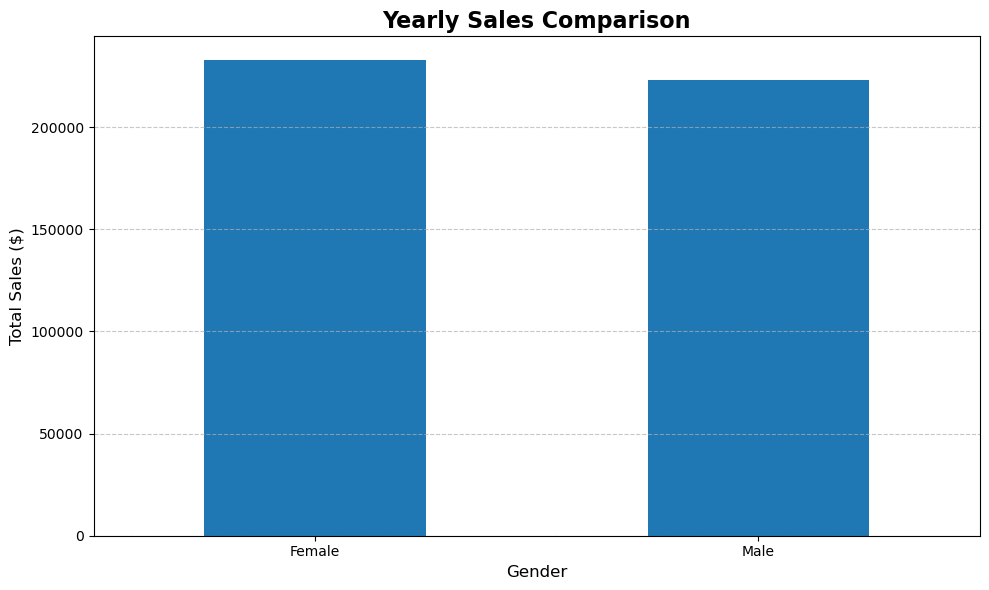

In [127]:
plt.figure(figsize=(10, 6))
Gender_Classification.plot(kind='bar', color='tab:blue')
plt.title('Yearly Sales Comparison', fontsize=16, fontweight='bold')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

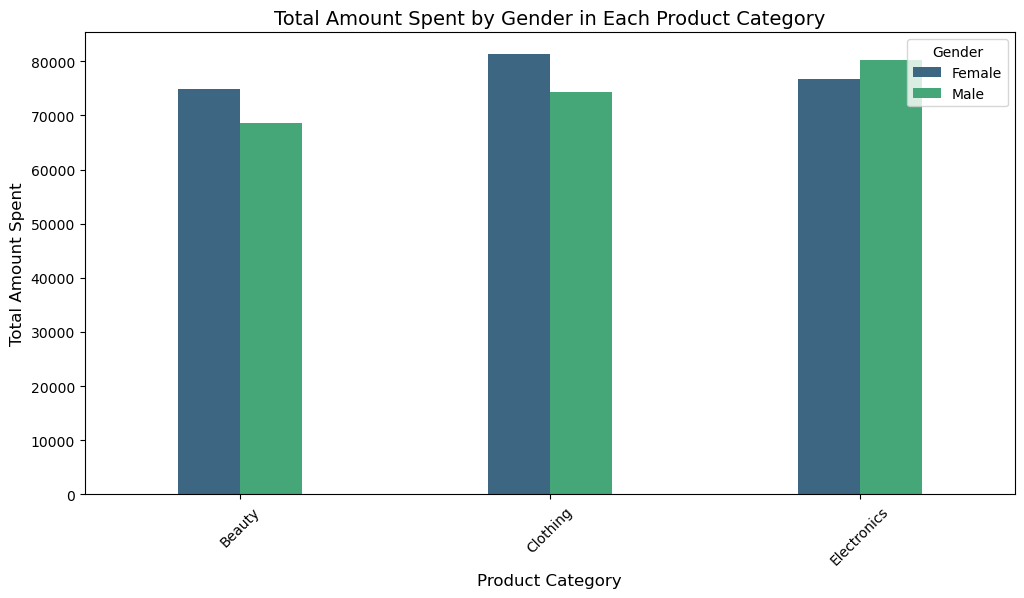

In [139]:
category_gender_sales = df.groupby(['Product Category', 'Gender'])['Total Amount'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Product Category', y='Total Amount', hue='Gender', data=category_gender_sales, palette='viridis',width=0.4)

plt.xticks(rotation=45)

plt.title("Total Amount Spent by Gender in Each Product Category", fontsize=14)
plt.xlabel("Product Category", fontsize=12)
plt.ylabel("Total Amount Spent", fontsize=12)

plt.show()

- Clearly it can be seen that females spent more money
- Females spent more amount for shopping than other categories

In [145]:
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Month,Week,Month_Num,Year,Age Range
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,2023-11,2023-11-20/2023-11-26,11,2023,32-37
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2023-02,2023-02-27/2023-03-05,2,2023,23-27
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,2023-01,2023-01-09/2023-01-15,1,2023,47-52
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,2023-05,2023-05-15/2023-05-21,5,2023,37-42
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,2023-05,2023-05-01/2023-05-07,5,2023,27-32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50,2023-05,2023-05-15/2023-05-21,5,2023,62+
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90,2023-11,2023-11-13/2023-11-19,11,2023,52-57
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100,2023-10,2023-10-23/2023-10-29,10,2023,23-27
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150,2023-12,2023-12-04/2023-12-10,12,2023,32-37


# Insights for Business Improvement

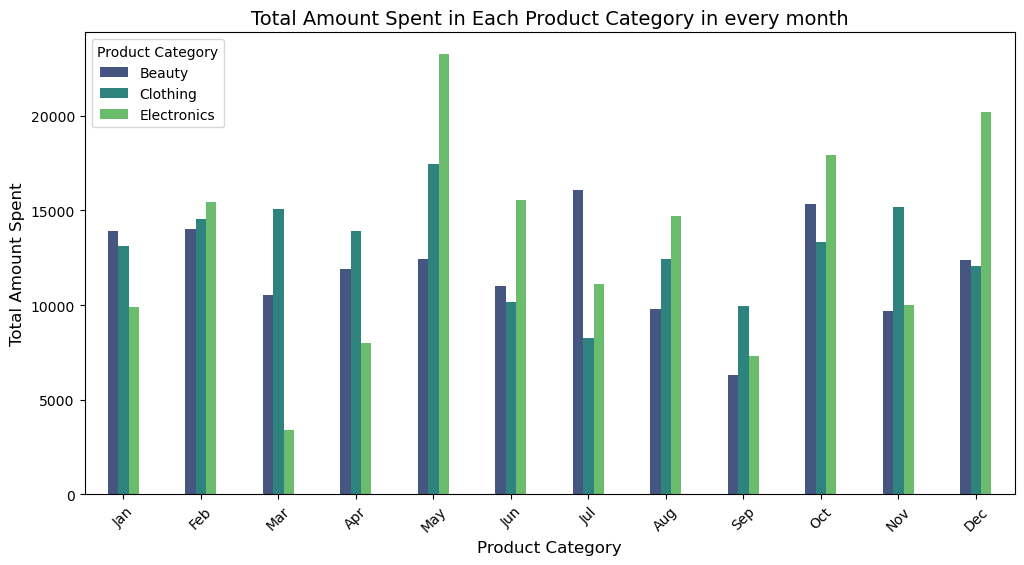

In [154]:
a = df.groupby(['Month_Num', 'Product Category'])['Total Amount'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Month_Num', y='Total Amount', hue='Product Category', data=a, palette='viridis',width=0.4)

plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)

plt.title("Total Amount Spent in Each Product Category in every month", fontsize=14)
plt.xlabel("Product Category", fontsize=12)
plt.ylabel("Total Amount Spent", fontsize=12)

plt.show()

- From the graph, we see that, in May, electronics products have been sold the most. So we can introduce different offers, discounts or marketing in May so that customers are attracted and buy more products
- Electronics sales percentage is too low in March. So different schemes should be proposed in March
- The overall sales of the retail store are really low in September. So the marketing process should be a key concern when September comes. Different strategies should be applied in September so that revenue is higher
- Clothing products have a constant trend. Means customers always buy clothing stuffs

C:\Users\HP\AppData\Local\Temp\ipykernel_14684\380950867.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  b = df.groupby(['Age Range', 'Product Category'])['Total Amount'].sum().reset_index()


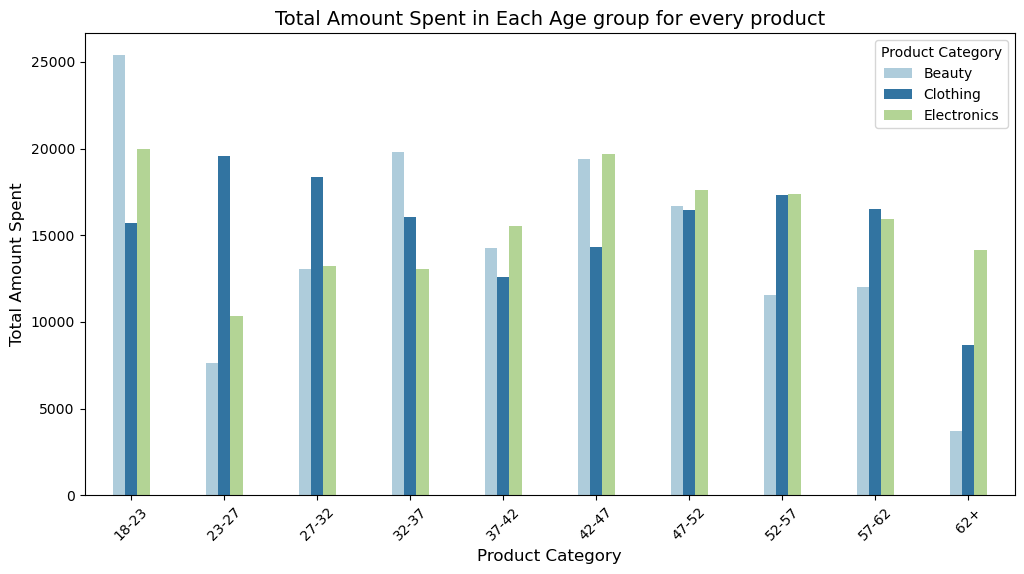

In [167]:
b = df.groupby(['Age Range', 'Product Category'])['Total Amount'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Age Range', y='Total Amount', hue='Product Category', data=b, palette='Paired',width=0.4)

plt.xticks(rotation=45)

plt.title("Total Amount Spent in Each Age group for every product", fontsize=14)
plt.xlabel("Product Category", fontsize=12)
plt.ylabel("Total Amount Spent", fontsize=12)

plt.show()

- For the age range analysis, we see that for the age of 18 to 23, which represents teenagers, they buy beauty products most of the time, and the sale is high as well. So many schemes should be attached for the teenagers at this range of age
- Also for aged people (62 and above), they basically dont buy that much products
- Here also clothing category is constant all over the age group, which means every age of people buy it